In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Import Data
overtime17 = pd.read_excel('../data/Overtime/2017_Details.xlsx')
overtime18 = pd.read_excel('../data/Overtime/2018_Details.xlsx')
overtime19 = pd.read_excel('../data/Overtime/2019_Details.xlsx')
overtime20 = pd.read_excel('../data/Overtime/2020_Details.xlsx')
overtime21 = pd.read_excel('../data/Overtime/2021_Details.xlsx')

KeyboardInterrupt: 

In [ ]:
# overtime = pd.concat([overtime12, overtime13, overtime14, overtime15, overtime16, overtime17, overtime18, overtime19, overtime20, overtime21])

overtime = pd.concat([overtime17, overtime18, overtime19, overtime20, overtime21])

In [2]:
overtime_court12 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2012')
overtime_court13 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2013')
overtime_court14 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2014')
overtime_court15 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2015')
overtime_court16 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2016')
overtime_court17 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2017')
overtime_court18 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2018')
overtime_court19 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2019')
overtime_court20 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2020')

In [29]:

def hhmm_to_hours(value):
    try:
        value = str(value).zfill(4)  
        hours = int(value[:2])
        minutes = int(value[2:])
        return hours + minutes / 60
    except:
        return None  




In [30]:
# Clean up column names (replace newlines, strip whitespace)
overtime.columns = overtime.columns.str.replace('\n', ' ', regex=True).str.strip()

# Now this will work cleanly:
df = pd.DataFrame({
    'Rank': overtime['Rank'],
    'Worked Hrs': overtime['Hours Worked'],
    'Paid Hrs': overtime['Hours Paid']
})
# 应用于 DataFrame
df['Worked Hrs'] = df['Worked Hrs'].apply(hhmm_to_hours)

/var/folders/7y/3cxkc6t534dg2mbwhpb4mbf80000gn/T/ipykernel_38751/1967809406.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rank_avg, x='Rank', y='Ratio', palette='viridis')


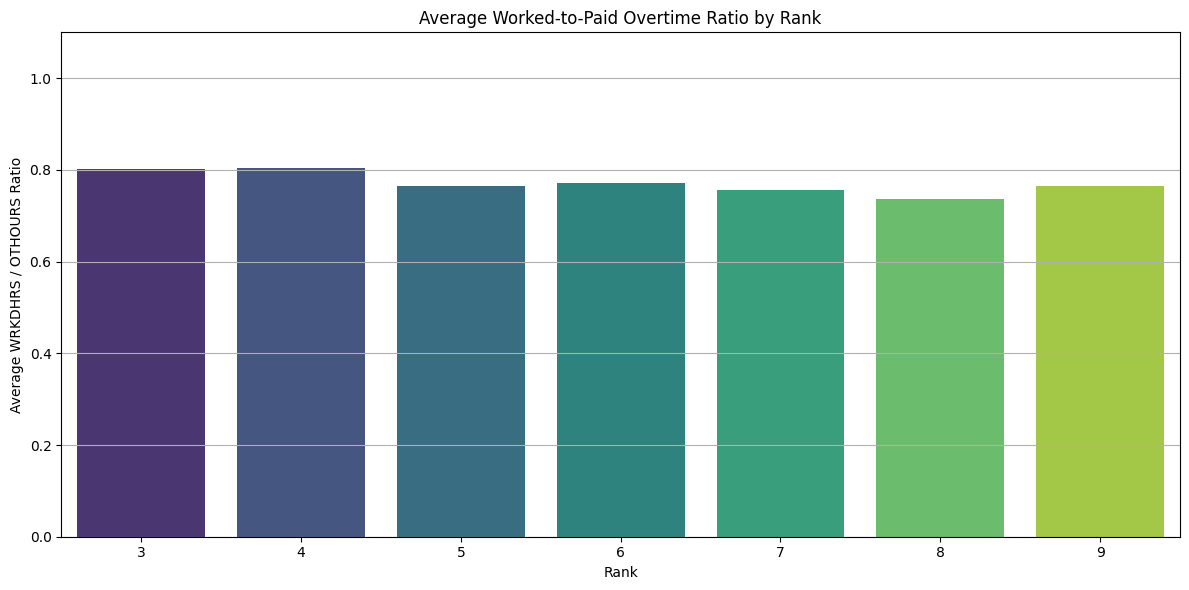

In [31]:
# Step 1: Compute the ratio
df['Ratio'] = df['Worked Hrs'] / df['Paid Hrs']

# Step 2: Group by Rank and calculate the mean ratio
rank_avg = df.groupby('Rank')['Ratio'].mean().reset_index()

# (Optional) Sort by average ratio for cleaner display
rank_avg = rank_avg.sort_values('Ratio', ascending=False)

# Step 3: Plot one bar per Rank
plt.figure(figsize=(12, 6))
sns.barplot(data=rank_avg, x='Rank', y='Ratio', palette='viridis')

plt.title('Average Worked-to-Paid Overtime Ratio by Rank')
plt.xlabel('Rank')
plt.ylabel('Average WRKDHRS / OTHOURS Ratio')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

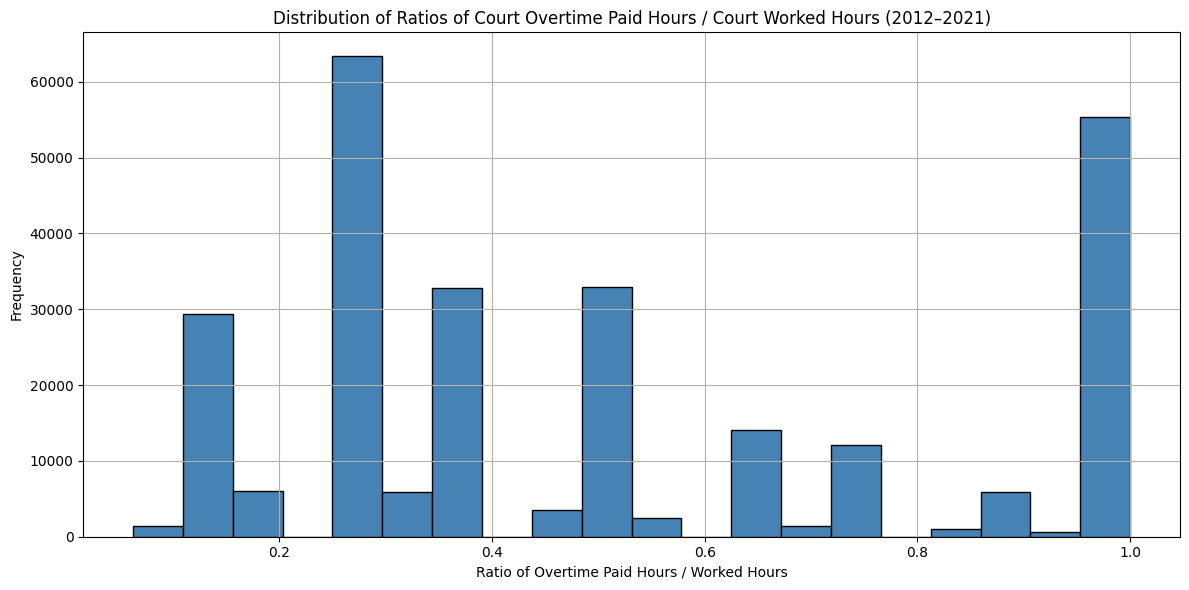

In [37]:
# Step 1: Combine all yearly data
overtimes = [
    overtime_court12, overtime_court13, overtime_court14,
    overtime_court15, overtime_court16, overtime_court17,
    overtime_court18, overtime_court19, overtime_court20
]
years = list(range(2012, 2022))

for df, year in zip(overtimes, years):
    df["Year"] = year  # add year to each DataFrame

# Step 2: Concatenate into a single DataFrame
overtime = pd.concat(overtimes, ignore_index=True)

# Step 3: Clean column names (handle weird line breaks or spaces)
overtime.columns = overtime.columns.str.replace('\n', ' ', regex=True).str.strip()

# Step 4: Drop rows with missing or invalid data
overtime = overtime.dropna(subset=["WRKDHRS", "OTHOURS"])
overtime = overtime[overtime["OTHOURS"] != 0]

# Step 5: Calculate ratio of Paid Hours to Worked Hours
overtime["Ratio"] = overtime["WRKDHRS"] / overtime["OTHOURS"]

# Step 6: Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(overtime["Ratio"], bins=20, color='steelblue', edgecolor='black')
plt.title("Distribution of Ratios of Court Overtime Paid Hours / Court Worked Hours (2012–2021)")
plt.xlabel("Ratio of Overtime Paid Hours / Worked Hours")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

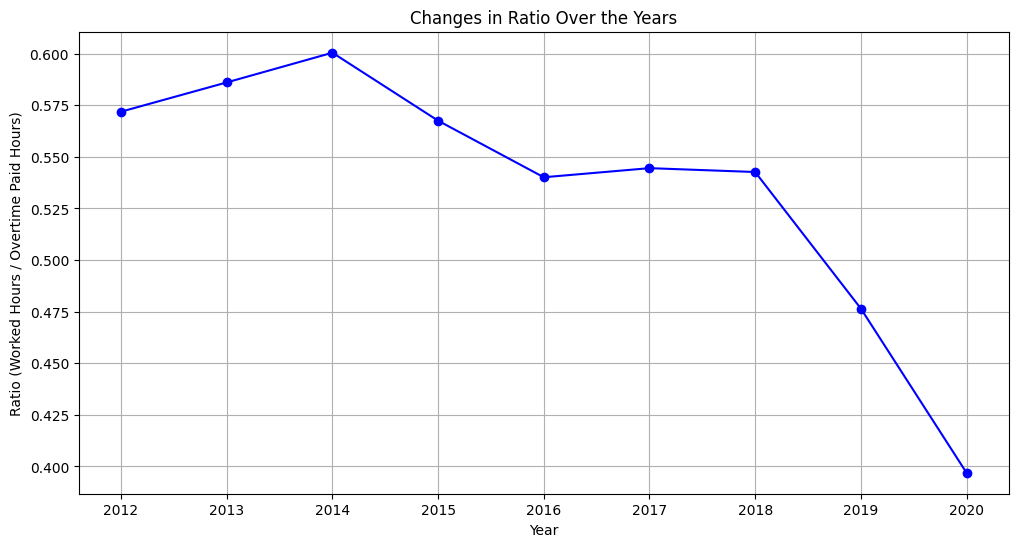

In [ ]:
# 计算每年的工作时长与加班支付时长的比值
def calculate_ratio(df):
    total_wrkdhrs = df['WRKDHRS'].sum()
    total_othours = df['OTHOURS'].sum()
    return total_wrkdhrs / total_othours if total_othours else 0

# 构建数据集
data_by_year = {
    2012: overtime_court12,
    2013: overtime_court13,
    2014: overtime_court14,
    2015: overtime_court15,
    2016: overtime_court16,
    2017: overtime_court17,
    2018: overtime_court18,
    2019: overtime_court19,
    2020: overtime_court20
}

# 计算比值
years = []
ratios = []
for year, df in data_by_year.items():
    years.append(year)
    ratios.append(calculate_ratio(df))

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(years, ratios, marker='o', color='blue')
plt.title('Changes in Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('Ratio (Worked Hours / Overtime Paid Hours)')
plt.grid(True)
plt.show()

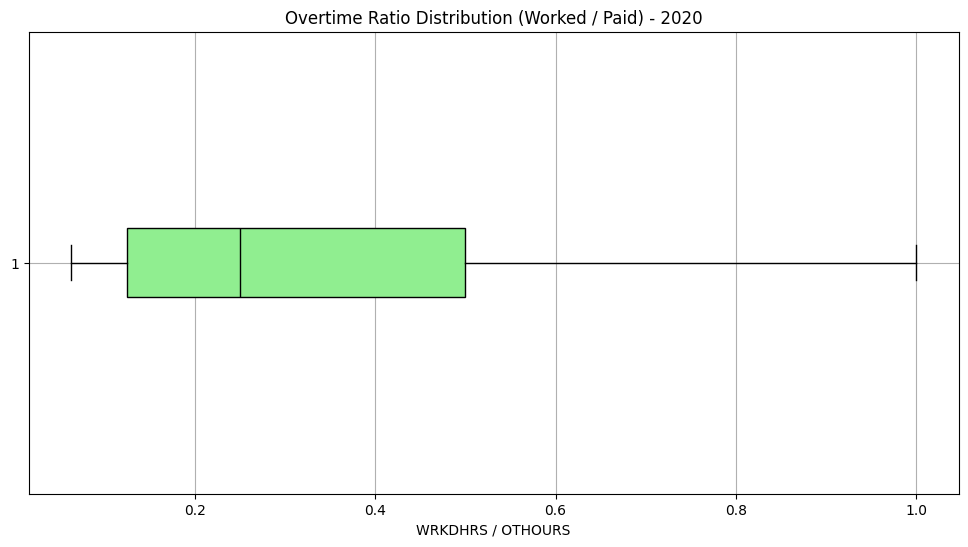

In [9]:
# 计算每条记录的比值（避免除以0）
overtime_court20['Ratio'] = overtime_court20.apply(
    lambda row: row['WRKDHRS'] / row['OTHOURS'] if row['OTHOURS'] != 0 else None, axis=1
)

# 去除空值
ratios_2020 = overtime_court20['Ratio'].dropna()

# 绘制箱型图
plt.figure(figsize=(12, 6))
plt.boxplot(ratios_2020, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='black'))

plt.title('Overtime Ratio Distribution (Worked / Paid) - 2020')
plt.xlabel('WRKDHRS / OTHOURS')
plt.grid(True)
plt.show()

In [12]:
# Calculate ratio (avoid division by zero)
overtime_court20['Ratio'] = overtime_court20.apply(
    lambda row: row['WRKDHRS'] / row['OTHOURS'] if row['OTHOURS'] != 0 else None, axis=1
)

# Filter outliers
outliers = overtime_court20[overtime_court20['Ratio'] < 0.1]

# Print only ID and Ratio
print("Outlier records (Ratio < 0.1):")
print(outliers[['ID', 'Ratio']])


Outlier records (Ratio < 0.1):
            ID   Ratio
123   108895.0  0.0625
280   140668.0  0.0625
318   106695.0  0.0625
410   108886.0  0.0625
544    10264.0  0.0625
...        ...     ...
9083  148321.0  0.0625
9107  148321.0  0.0625
9139  148321.0  0.0625
9162  157665.0  0.0625
9171  153132.0  0.0625

[201 rows x 2 columns]
